<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week3/Outlier_Detection_With_IQR_Faisal_Elawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outlier Detection With IQR using Housing DataSet**

[Housing Data Set ](https://github.com/falawar7/AAI614_ELAWAR/blob/main/Week3/Housing.csv)

In [164]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [165]:
housing = pd.read_csv("https://raw.githubusercontent.com/falawar7/AAI614_ElAWAR/main/Week3/Housing.csv")

In [166]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [167]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [168]:
housing.shape

(545, 13)

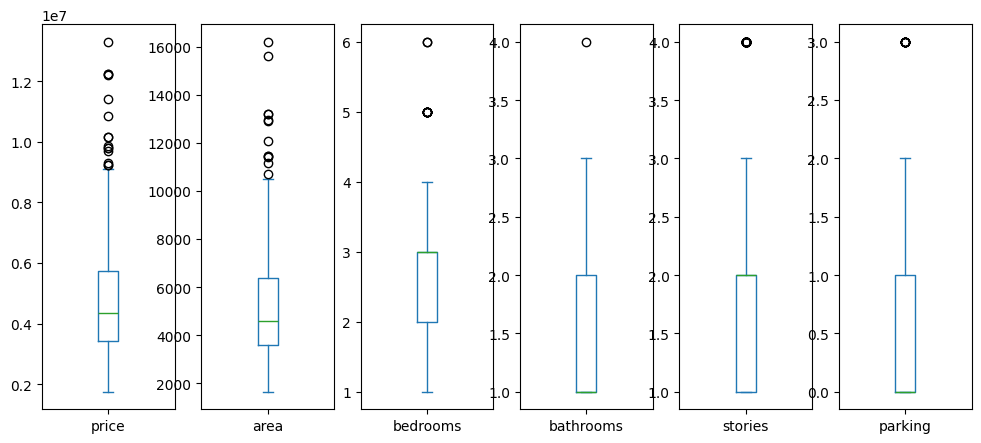

In [169]:
import matplotlib.pyplot as plt
housing.plot(kind = 'box', subplots = True, figsize = (12, 5))
plt.show()

<Axes: >

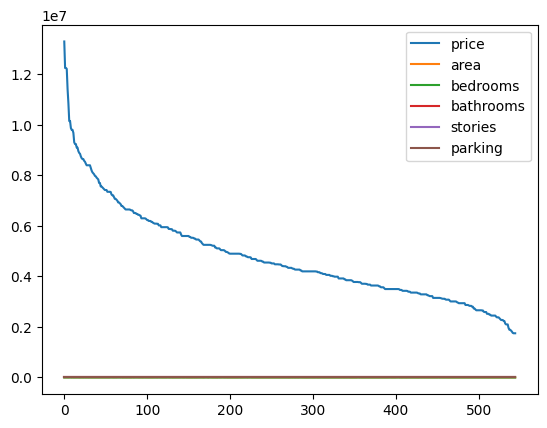

In [121]:
housing.plot()

<Axes: xlabel='area', ylabel='furnishingstatus'>

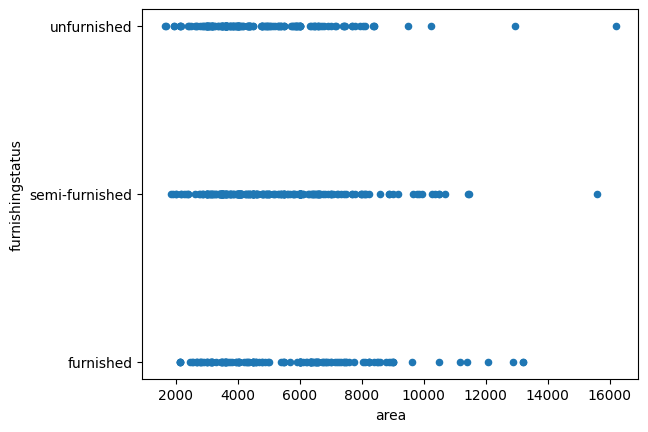

In [122]:
housing.plot(kind = 'scatter', x = 'area', y = 'furnishingstatus')

<Axes: xlabel='area', ylabel='price'>

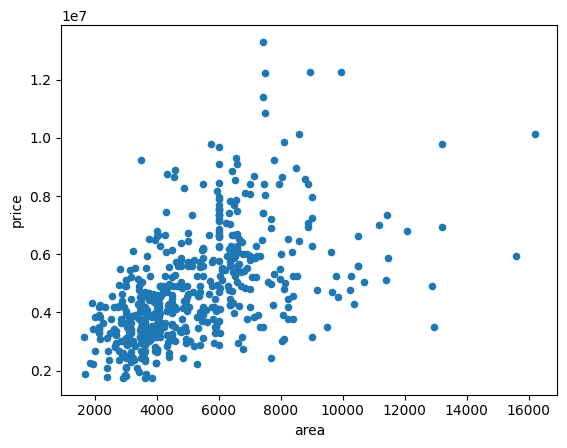

In [123]:
housing.plot(kind = 'scatter', x = 'area', y = 'price')

In [124]:
import seaborn as sns # Import the seaborn library and assign it the alias 'sns'
import matplotlib.pyplot as plt

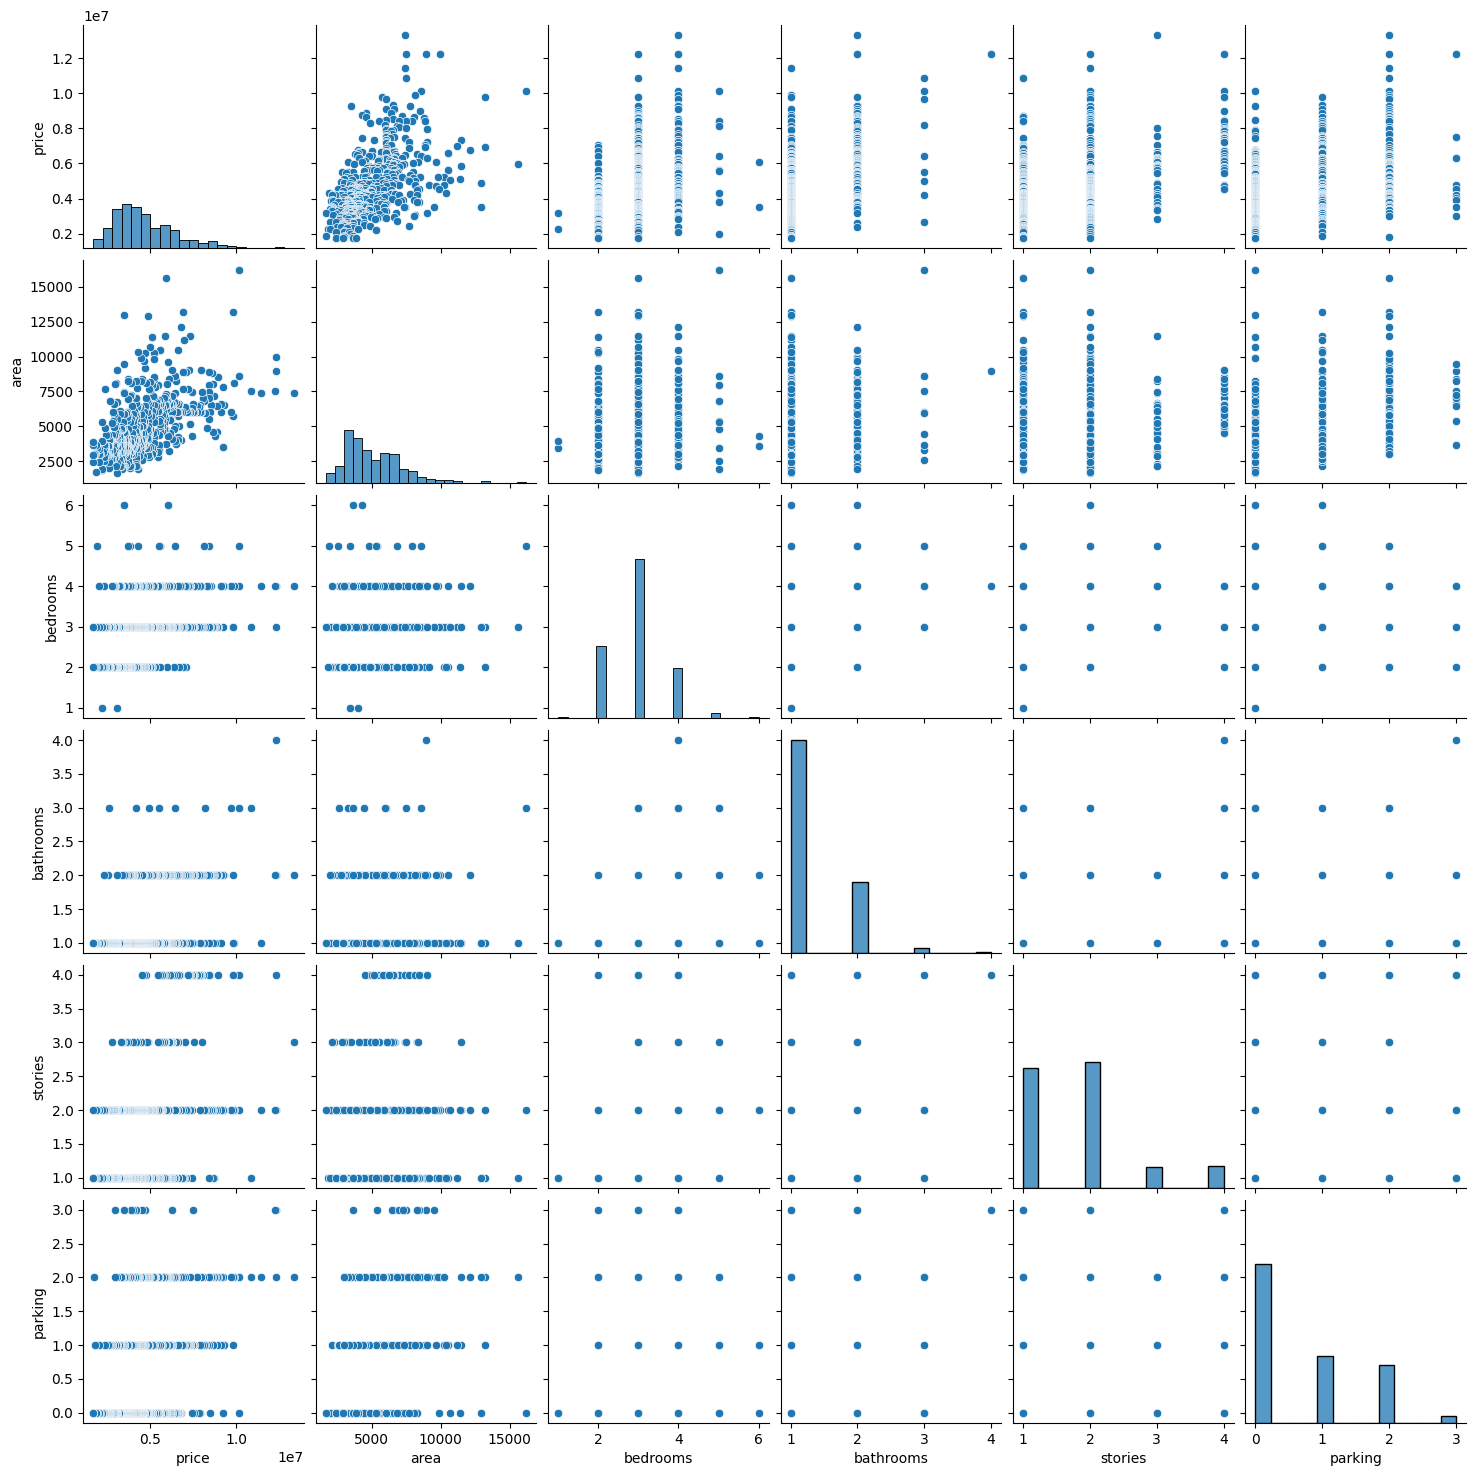

In [125]:
sns.pairplot(data = housing)

In [170]:
housing['furnishingstatus_numeric'] = housing['furnishingstatus'].map({'yes': 1, 'no': 0, 'furnished':1, 'semi-furnished':0.5, 'unfurnished':0})

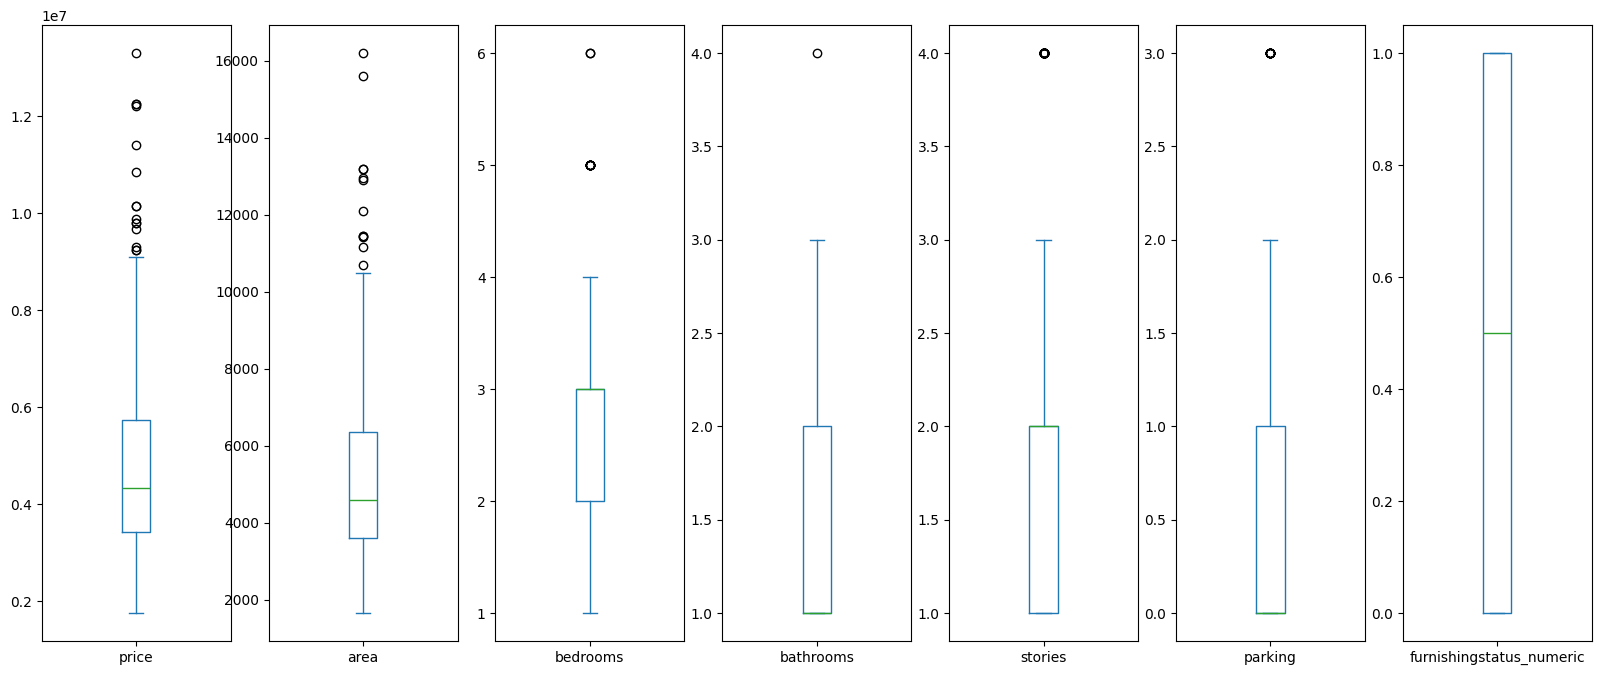

In [172]:
import matplotlib.pyplot as plt
housing.plot(kind = 'box', subplots = True, figsize = (20, 8))
plt.show()

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
corr_matrix = housing.select_dtypes(include=['number']).corr()

In [175]:
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_numeric
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.104672
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.177539
furnishingstatus_numeric,0.304721,0.171445,0.123244,0.143559,0.104672,0.177539,1.000000


<Axes: >

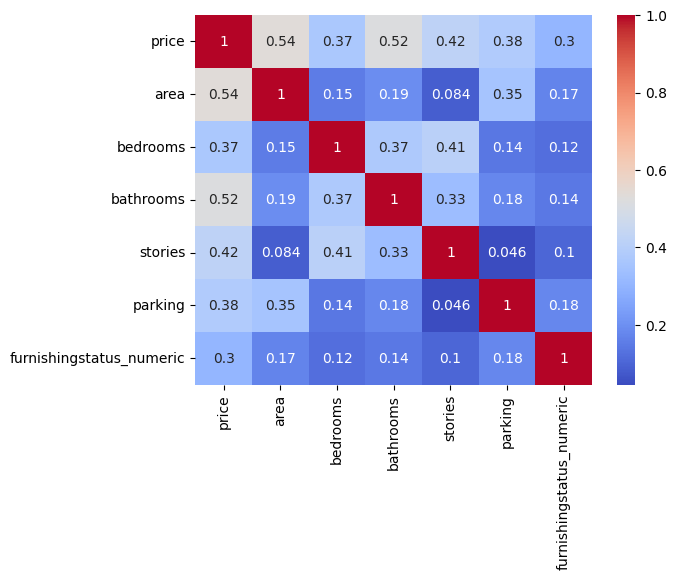

In [176]:
sns.heatmap(housing.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')

In [177]:
import numpy as np
import pandas as pd

numeric_cols = housing.select_dtypes(include=np.number).columns.tolist()

In [178]:
print(f"Numeric Columns: {numeric_cols}")

Numeric Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus_numeric']


In [179]:
def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nIdentifying outliers using IQR Method:")
for col in numeric_cols:
    outliers_IQR, lower, upper = identify_outliers_IQR(housing[col])
    if not outliers_IQR.empty:
        print(f"\nOutliers in {col} (IQR method):")
        print(outliers_IQR)
        print(f"Lower Bound: {lower}")
        print(f"Upper Bound: {upper}")


Identifying outliers using IQR Method:

Outliers in price (IQR method):
0     13300000
1     12250000
2     12250000
3     12215000
4     11410000
5     10850000
6     10150000
7     10150000
8      9870000
9      9800000
10     9800000
11     9681000
12     9310000
13     9240000
14     9240000
Name: price, dtype: int64
Lower Bound: -35000.0
Upper Bound: 9205000.0

Outliers in area (IQR method):
7      16200
10     13200
56     11440
64     11175
66     13200
69     12090
125    15600
129    11460
186    11410
191    10700
211    12900
403    12944
Name: area, dtype: int64
Lower Bound: -540.0
Upper Bound: 10500.0

Outliers in bedrooms (IQR method):
7      5
28     5
34     5
89     5
112    6
143    5
152    5
271    5
340    5
356    5
395    6
536    5
Name: bedrooms, dtype: int64
Lower Bound: 0.5
Upper Bound: 4.5

Outliers in bathrooms (IQR method):
1    4
Name: bathrooms, dtype: int64
Lower Bound: -0.5
Upper Bound: 3.5

Outliers in stories (IQR method):
1      4
6      4
9      4

In [135]:
housing.shape

(545, 14)

In [180]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()  # Use a set to avoid duplicate indices

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices)) # Convert the set back to a pandas Index

# Example usage:
outlier_indices = outliers(housing, 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking')
print(outlier_indices)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  17, 536,  26,  28,  30,  31,  34,  35,  37,  38,  39,  41,  42,
        43,  44,  46,  47,  50,  51,  52,  53,  56,  57,  58,  59,  64,  66,
        69,  71,  72,  73,  83,  89,  92,  93,  94, 102, 105, 112, 124, 125,
       129, 131, 135, 140, 143, 145, 152, 160, 186, 191, 211, 220, 225, 226,
       247, 271, 299, 304, 323, 331, 340, 356, 395, 401, 403, 472],
      dtype='int64')


In [181]:
housing.shape

(545, 14)

In [182]:
for i in outlier_indices:
    housing = housing.drop(i)

In [183]:
housing.shape

(463, 14)

In [184]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_numeric
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,0.5
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,0.0
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,1.0
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,0.5
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.5
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.0


In [141]:
missing_data = housing.isnull().sum()
missing_percentage = (missing_data / housing.shape[0]) * 100

In [142]:
print(f"Missing values per column:\n{missing_data}")
print(f"\nMissing percentage per column:\n{missing_percentage}")

Missing values per column:
price                       0
area                        0
bedrooms                    0
bathrooms                   0
stories                     0
mainroad                    0
guestroom                   0
basement                    0
hotwaterheating             0
airconditioning             0
parking                     0
prefarea                    0
furnishingstatus            0
furnishingstatus_numeric    0
dtype: int64

Missing percentage per column:
price                       0.0
area                        0.0
bedrooms                    0.0
bathrooms                   0.0
stories                     0.0
mainroad                    0.0
guestroom                   0.0
basement                    0.0
hotwaterheating             0.0
airconditioning             0.0
parking                     0.0
prefarea                    0.0
furnishingstatus            0.0
furnishingstatus_numeric    0.0
dtype: float64


In [185]:
housing.shape

(463, 14)

In [186]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_numeric
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,0.5
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,0.0
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,1.0
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,0.5
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished,0.5


In [187]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_numeric
count,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.373745e+06,4766.583153,2.857451,1.220302,1.615551,0.587473,0.442765
std,1.465136e+06,1795.315000,0.658924,0.440211,0.626901,0.776003,0.374320
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.342500e+06,3490.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.200000e+06,4300.000000,3.000000,1.000000,2.000000,0.000000,0.500000
75%,5.222000e+06,6000.000000,3.000000,1.000000,2.000000,1.000000,0.500000
max,9.100000e+06,10500.000000,4.000000,3.000000,3.000000,2.000000,1.000000


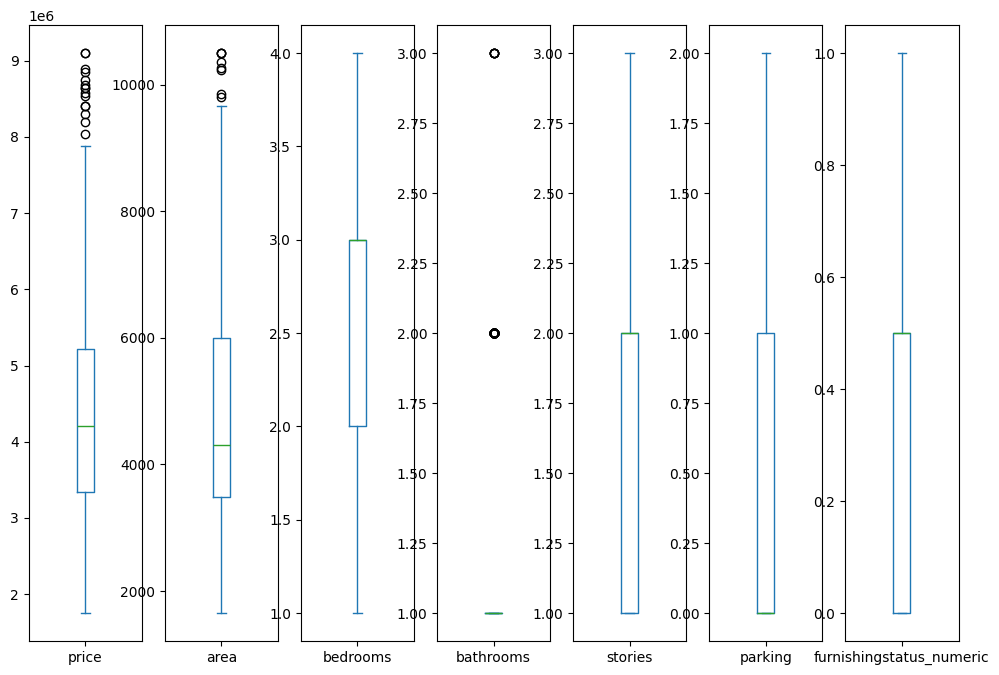

In [189]:
import matplotlib.pyplot as plt
housing.plot(kind = 'box', subplots = True, figsize = (12, 8))
plt.show()

In [191]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()  # Use a set to avoid duplicate indices

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices)) # Convert the set back to a pandas Index

# Example usage:
outlier_indices = outliers(housing, 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking')
print(outlier_indices)

Index([523,  15,  16,  18,  19,  20,  21,  22,  23,  24,
       ...
       348, 374, 376, 377, 383, 390, 413, 446, 499, 509],
      dtype='int64', length=106)


In [192]:
for i in outlier_indices:
    housing = housing.drop(i)

In [193]:
housing.shape

(357, 14)

In [194]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()  # Use a set to avoid duplicate indices

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices)) # Convert the set back to a pandas Index

# Example usage:
outlier_indices = outliers(housing, 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking')
print(outlier_indices)

Index([96, 452, 40, 113, 55, 61, 222], dtype='int64')


In [195]:
for i in outlier_indices:
    housing = housing.drop(i)

In [196]:
housing.shape

(350, 14)

Columns with outliers: ['price']


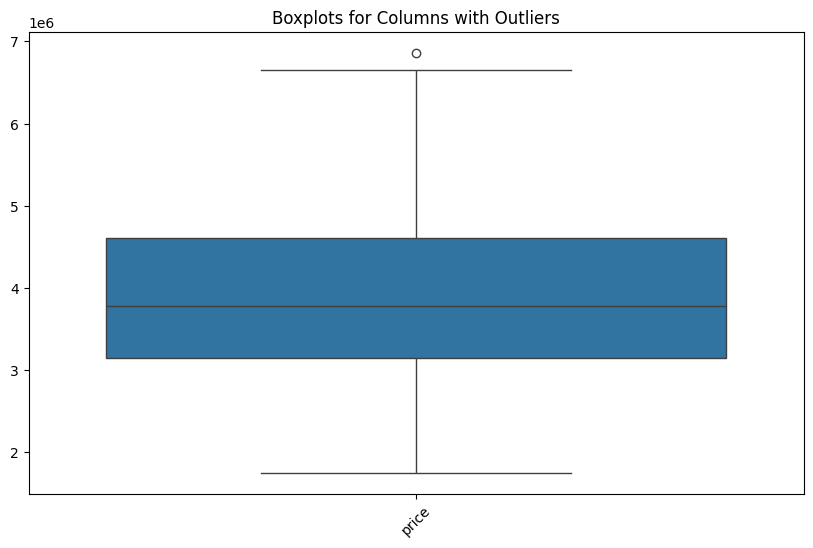

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers(df):
    """
    Identifies columns with outliers using the IQR method and plots boxplots for those columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Displays box plots for columns with outliers.
    """

    # Create an empty list to store columns with outliers
    columns_with_outliers = []

    # Iterate through each column in the DataFrame
    for col in df.select_dtypes(include=[np.number]).columns:  # Only numerical columns
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers: values outside the lower and upper bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # If there are outliers in the column, add it to the list
        if not outliers.empty:
            columns_with_outliers.append(col)

    # If there are columns with outliers, plot them
    if columns_with_outliers:
        print(f"Columns with outliers: {columns_with_outliers}")
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[columns_with_outliers])
        plt.title("Boxplots for Columns with Outliers")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No columns with outliers detected.")

# Example usage:
# Assuming 'housing' is your DataFrame
plot_outliers(housing)


In [198]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()  # Use a set to avoid duplicate indices

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices)) # Convert the set back to a pandas Index

# Example usage:
outlier_indices = outliers(housing, 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking')
print(outlier_indices)

Index([68], dtype='int64')


In [199]:
for i in outlier_indices:
    housing = housing.drop(i)

In [200]:
housing.shape

(349, 14)

In [201]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()  # Use a set to avoid duplicate indices

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices)) # Convert the set back to a pandas Index

# Example usage:
outlier_indices = outliers(housing, 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking')
print(outlier_indices)

Index([], dtype='object')


In [202]:
housing.shape

(349, 14)

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers(df):
    """
    Identifies columns with outliers using the IQR method and plots boxplots for those columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Displays box plots for columns with outliers.
    """

    # Create an empty list to store columns with outliers
    columns_with_outliers = []

    # Iterate through each column in the DataFrame
    for col in df.select_dtypes(include=[np.number]).columns:  # Only numerical columns
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers: values outside the lower and upper bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # If there are outliers in the column, add it to the list
        if not outliers.empty:
            columns_with_outliers.append(col)

    # If there are columns with outliers, plot them
    if columns_with_outliers:
        print(f"Columns with outliers: {columns_with_outliers}")
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[columns_with_outliers])
        plt.title("Boxplots for Columns with Outliers")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No columns with outliers detected.")

# Example usage:
# Assuming 'housing' is your DataFrame
plot_outliers(housing)


No columns with outliers detected.


In [205]:
row_threshold = 0.85
column_threshold = 0.9

In [206]:
housing.dropna(axis=0, thresh=row_threshold * housing.shape[1], inplace=True)
housing.dropna(axis=1, thresh=column_threshold * housing.shape[0], inplace=True)

In [207]:
housing.shape

(349, 14)

In [208]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_numeric
74,6650000,4040,3,1,2,yes,no,yes,yes,no,1,no,furnished,1.0
78,6650000,5700,3,1,1,yes,yes,yes,no,yes,2,yes,furnished,1.0
80,6629000,6000,3,1,2,yes,no,no,yes,no,1,yes,semi-furnished,0.5
84,6510000,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished,0.5
86,6510000,6670,3,1,3,yes,no,yes,no,no,0,yes,unfurnished,0.0


In [209]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_numeric
74,6650000,4040,3,1,2,yes,no,yes,yes,no,1,no,furnished,1.0
78,6650000,5700,3,1,1,yes,yes,yes,no,yes,2,yes,furnished,1.0
80,6629000,6000,3,1,2,yes,no,no,yes,no,1,yes,semi-furnished,0.5
84,6510000,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished,0.5
86,6510000,6670,3,1,3,yes,no,yes,no,no,0,yes,unfurnished,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.5
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.0


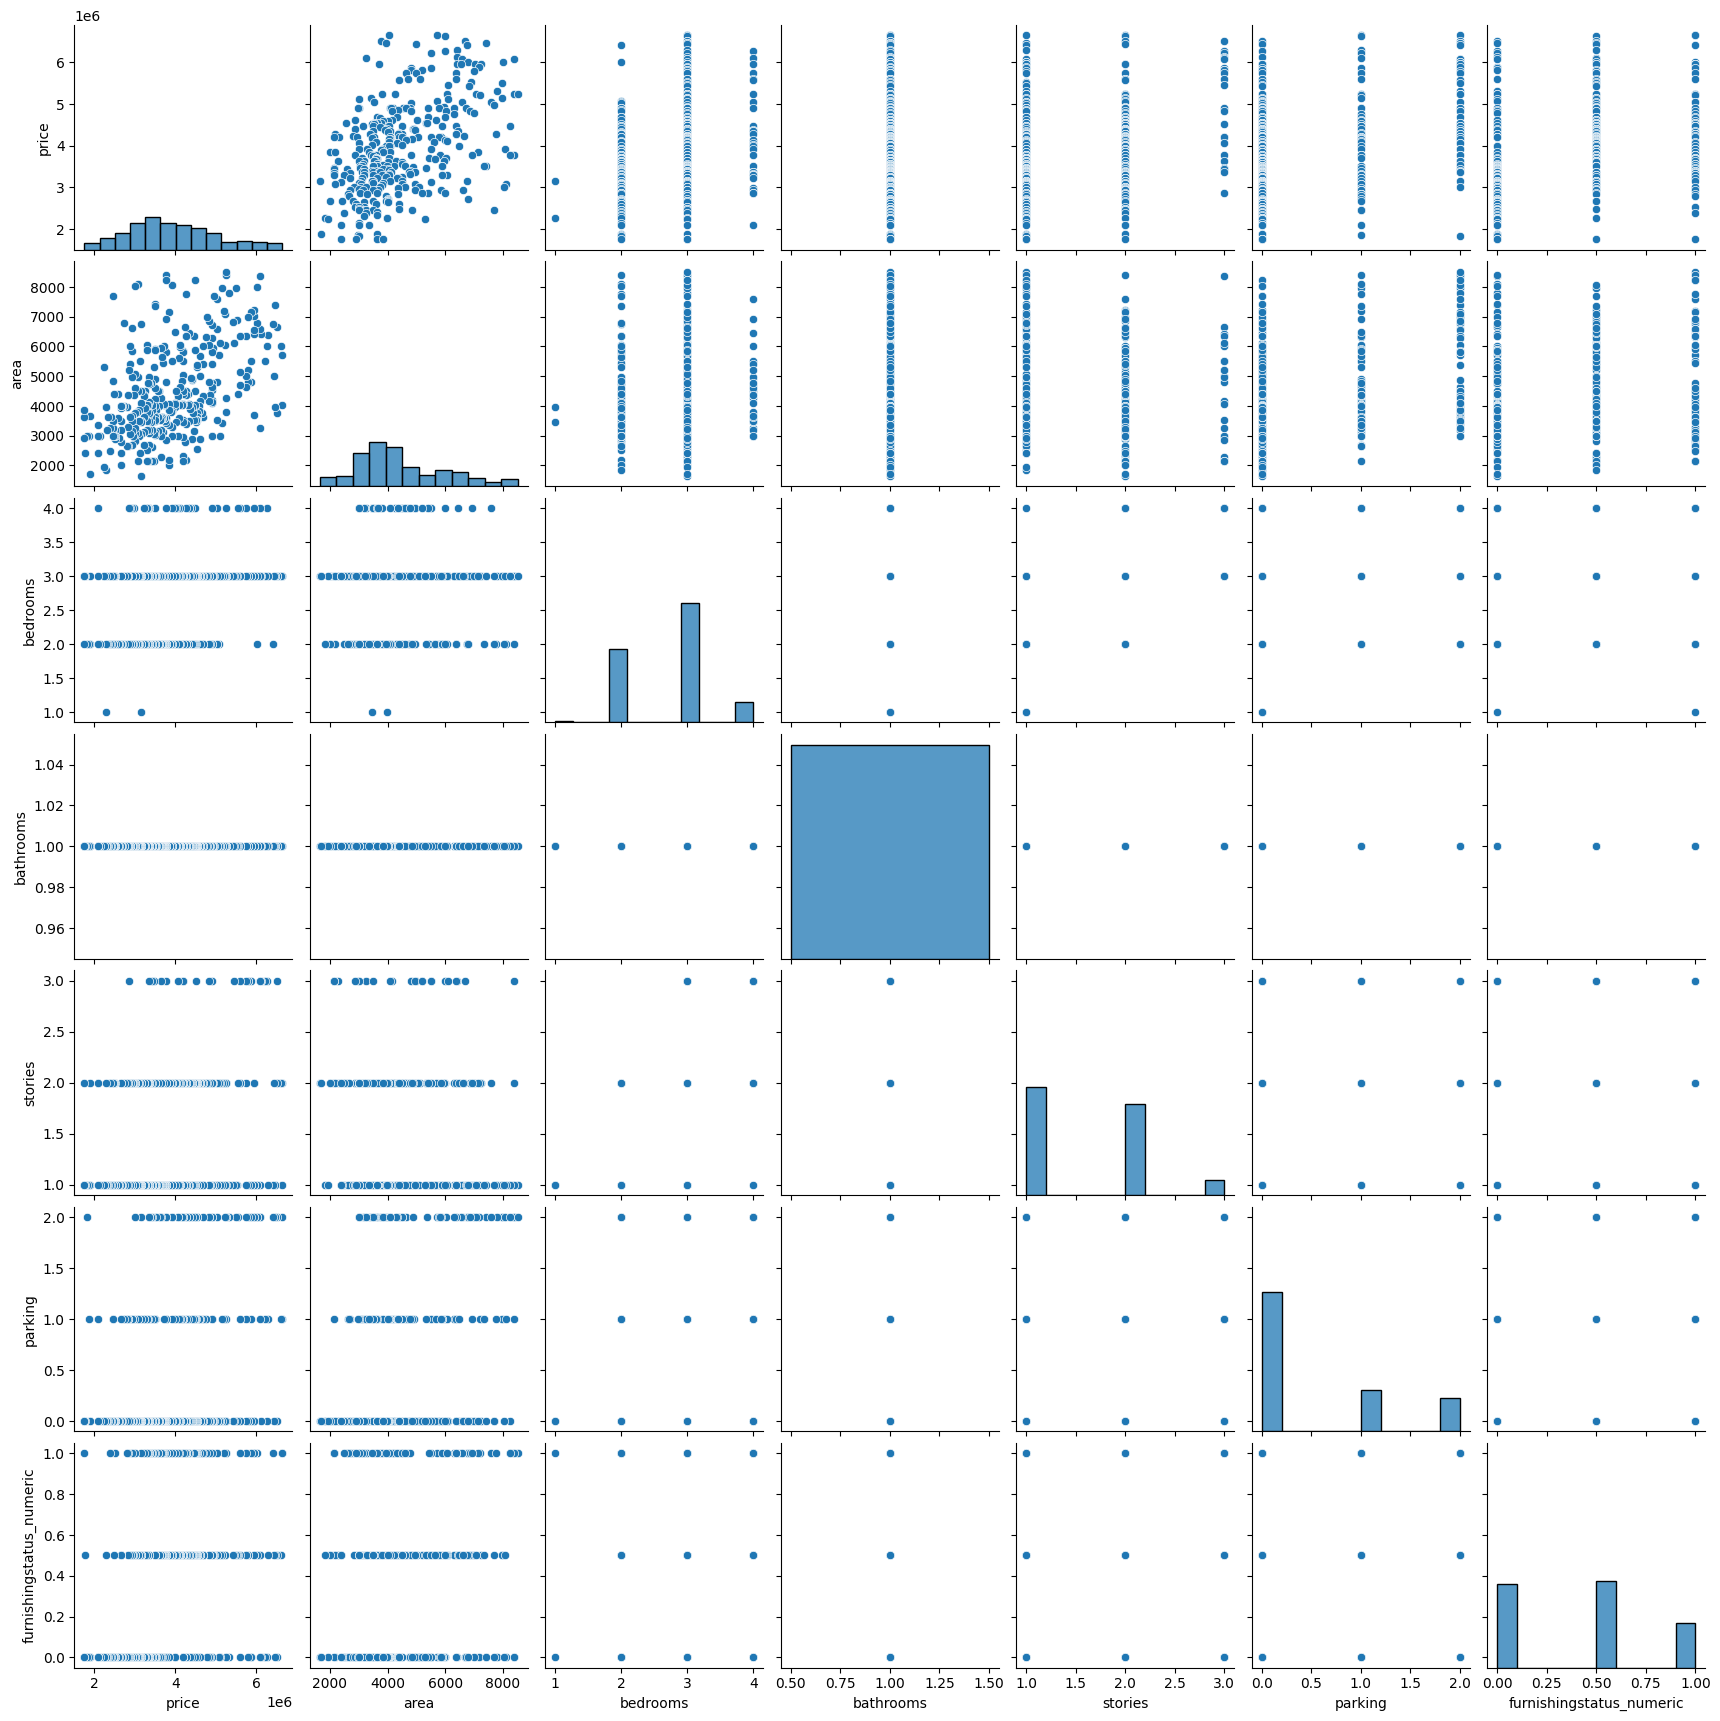

In [210]:
sns.pairplot(data = housing)

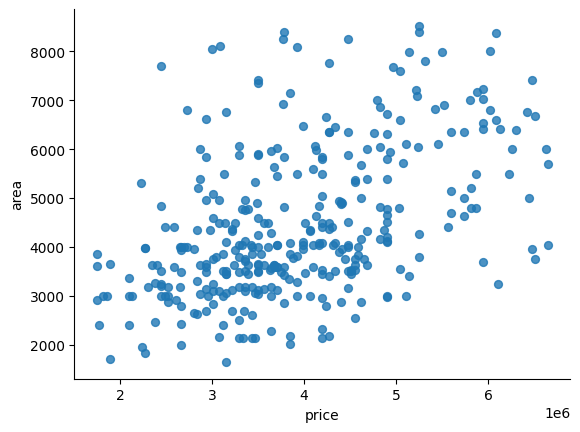

In [211]:
from matplotlib import pyplot as plt
housing.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

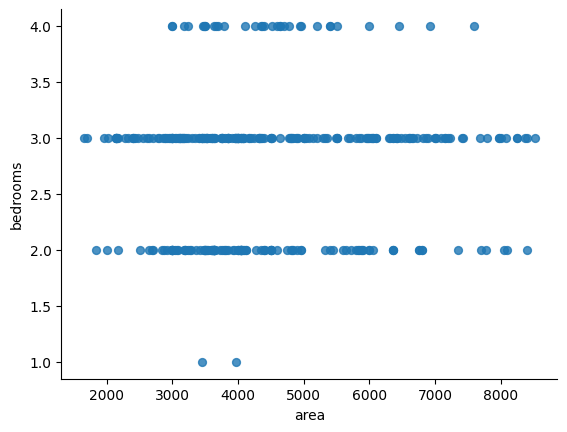

In [212]:
# @title area vs bedrooms

from matplotlib import pyplot as plt
housing.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

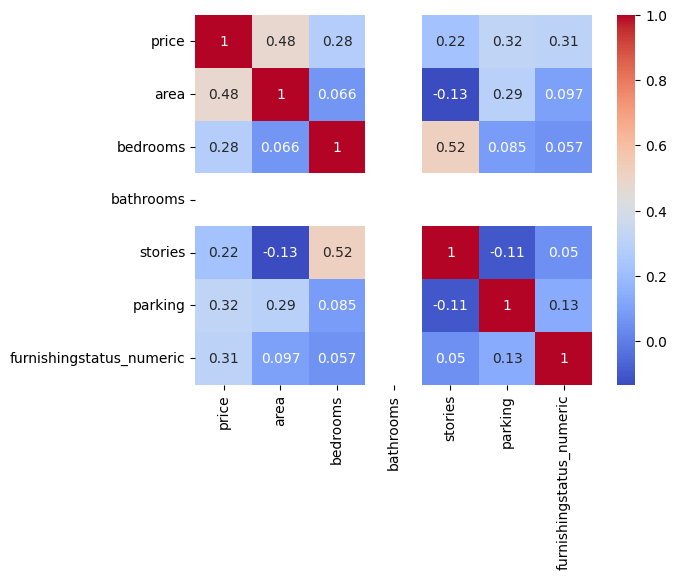

In [213]:
sns.heatmap(housing.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')

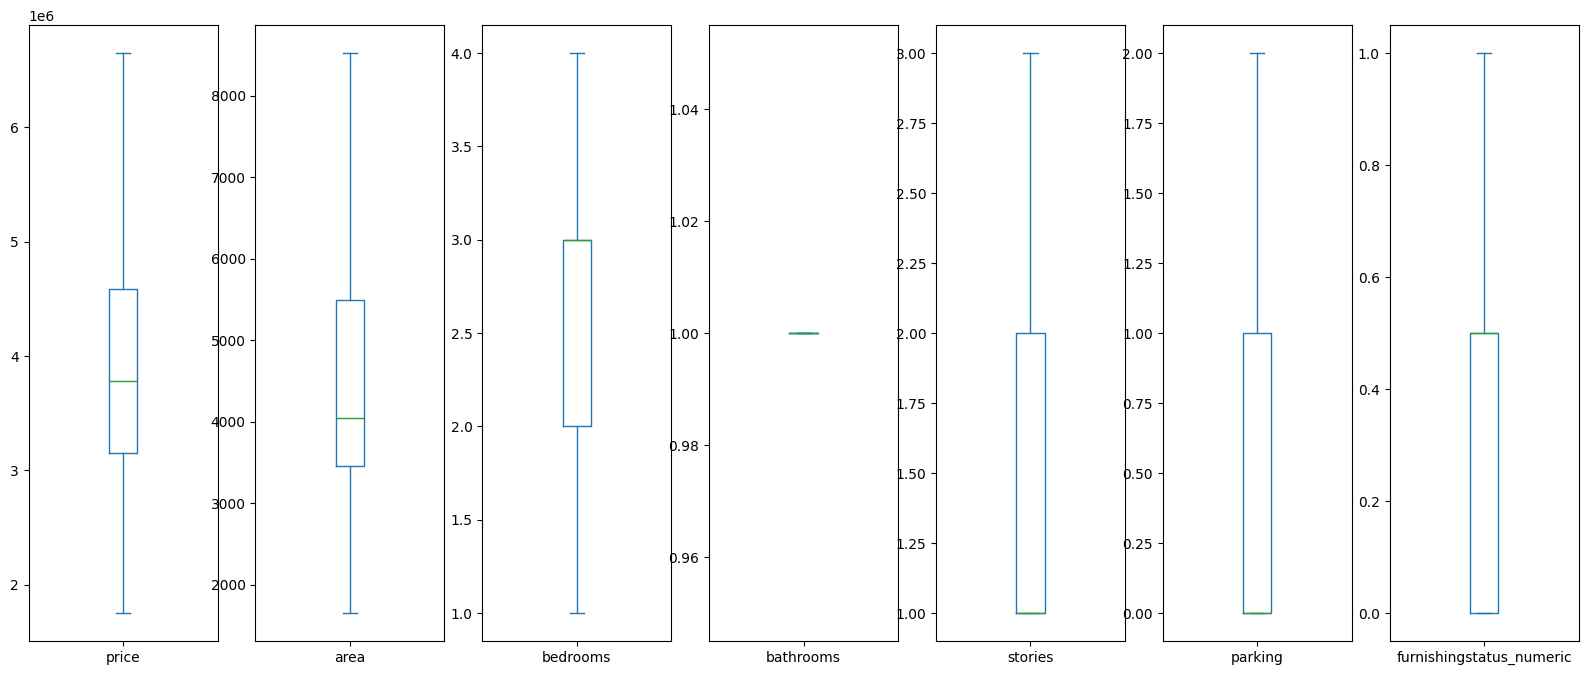

In [214]:
import matplotlib.pyplot as plt
housing.plot(kind = 'box', subplots = True, figsize = (20, 8))
plt.show()

In [215]:
housing.shape

(349, 14)